<h1> about corona </h1>

**important note :**

**recovered data set does not show correct values for 12/12/20 and later**

 ## importing required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
plt.style.use('ggplot')

## downloading data sets

In [2]:
recoverd_url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv'
confirmed_url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv'
deaths_url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv'


recoverd_df = pd.read_csv(recoverd_url)
confirmed_df = pd.read_csv(confirmed_url)
deaths_df = pd.read_csv(deaths_url)

## getting all data sets ready - step by step

In [3]:
c_df = confirmed_df.copy()
r_df = recoverd_df.copy()
d_df = deaths_df.copy()

In [4]:
# please change the local path to your to your own path of population data set
local_path = 'C:/Users/thisi/Documents/Population.csv'
population_df = pd.read_csv(local_path)
population_df.index = population_df['Country/Region']
population_df = population_df.drop(population_df.columns[0], axis=1)

In [5]:
c_df = c_df.drop(c_df.columns[[0, 2, 3]], axis=1)
r_df = r_df.drop(r_df.columns[[0, 2, 3]], axis=1)
d_df = d_df.drop(d_df.columns[[0, 2, 3]], axis=1)

In [6]:
c_df = c_df.groupby('Country/Region').sum()
r_df = r_df.groupby('Country/Region').sum()
d_df = d_df.groupby('Country/Region').sum()

In [7]:
as_list = c_df.index.tolist()
as_list[-10] = 'UK'
c_df.index = as_list
####################
as_list = r_df.index.tolist()
as_list[-10] = 'UK'
r_df.index = as_list
####################
as_list = d_df.index.tolist()
as_list[-10] = 'UK'
d_df.index = as_list

In [8]:
c_df = c_df.transpose()
r_df = r_df.transpose()
d_df = d_df.transpose()

In [9]:
del c_df['Diamond Princess']
del r_df['Diamond Princess']
del d_df['Diamond Princess']

## about data sets

In [10]:
data_sets = [c_df, r_df, d_df]
for data in data_sets:
    print(data.info(), '\n\n\n')

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 1/22/20 to 12/19/20
Columns: 190 entries, Afghanistan to Zimbabwe
dtypes: int64(190)
memory usage: 506.9+ KB
None 



<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 1/22/20 to 12/19/20
Columns: 190 entries, Afghanistan to Zimbabwe
dtypes: int64(190)
memory usage: 506.9+ KB
None 



<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 1/22/20 to 12/19/20
Columns: 190 entries, Afghanistan to Zimbabwe
dtypes: int64(190)
memory usage: 506.9+ KB
None 





In [11]:
print(f'list of countries :\n\n {c_df.columns}')

list of countries :

 Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'UK', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=190)


In [12]:
print('start day : {}\nlast date : {}\nfirst country : {}\nlast country : {}\nnumer of dates : {}\nnumer of countries : {}'.format(
    c_df.index[0], datetime.datetime.now(), c_df.columns[0], c_df.columns[-1], c_df.shape[0], c_df.shape[1]))

start day : 1/22/20
last date : 2020-12-20 23:15:40.930696
first country : Afghanistan
last country : Zimbabwe
numer of dates : 333
numer of countries : 190


## numeric reports

### global report

In [13]:
def convert_today_date():
    today = datetime.datetime.today()
    today = today - datetime.timedelta(days=1)
    return '{}/{}/{}'.format(today.month, today.day, str(today.year)[:-2])


def convert_yesterday_date():
    format = "%m/%d/%Y"
    today = datetime.datetime.today()
    yesterday = today - datetime.timedelta(days=2)
    return '{}/{}/{}'.format(yesterday.month, yesterday.day, str(yesterday.year)[:-2])


def country_numeric_report(country='US'):

    date1 = convert_today_date()
    date2 = convert_yesterday_date()

    print(f'covid-19 summary report for {country}.\n\n    date : {date1}\n\n\ntotal cases : {c_df.loc[date1,country].sum()}\nnew cases : {c_df.loc[date1,country].sum() - c_df.loc[date2,country].sum()}\n\ntotal recoverd : {r_df.loc[date1,country].sum()}\nnew recovered : {r_df.loc[date1,country].sum() - r_df.loc[date2,country].sum()}\ntotal recovered to total cases ratio : {r_df.loc[date1,country].sum() / c_df.loc[date1,country].sum()}\n\ntotal deaths : {d_df.loc[date1,country].sum()}\nnew deaths : {d_df.loc[date1,country].sum() - d_df.loc[date2,country].sum()}\ntotal deaths to total cases ratio : {d_df.loc[date1,country].sum()/c_df.loc[date1,country].sum()}\n\ntotal deaths to total recovered ratio : {d_df.loc[date1,country].sum()/r_df.loc[date1,country].sum()}')

In [14]:
print(f'Global summary report.\ndate : {convert_today_date()}\n\ntotal cases : {c_df.loc[convert_today_date()].sum()}\nnew cases : {c_df.loc[convert_today_date()].sum() - c_df.loc[convert_yesterday_date()].sum()}\n\ntotal recoverd : {r_df.loc[convert_today_date()].sum()}\nnew recovered : {r_df.loc[convert_today_date()].sum() - r_df.loc[convert_today_date()].sum()}\n\ntotal deaths : {d_df.loc[convert_today_date()].sum()}\nnew deaths : {d_df.loc[convert_today_date()].sum() - d_df.loc[convert_yesterday_date()].sum()}')

Global summary report.
date : 12/19/20

total cases : 76288330
new cases : 616228

total recoverd : 43022353
new recovered : 0

total deaths : 1685513
new deaths : 10686


In [15]:
country_numeric_report('Italy')

covid-19 summary report for Italy.

    date : 12/19/20


total cases : 1938083
new cases : 16305

total recoverd : 1249470
new recovered : 23384
total recovered to total cases ratio : 0.6446937515059985

total deaths : 68447
new deaths : 553
total deaths to total cases ratio : 0.03531685691479673

total deaths to total recovered ratio : 0.05478082707067797


In [16]:
country_numeric_report('Iran')

covid-19 summary report for Iran.

    date : 12/19/20


total cases : 1152072
new cases : 6421

total recoverd : 875943
new recovered : 10469
total recovered to total cases ratio : 0.76031966752078

total deaths : 53448
new deaths : 175
total deaths to total cases ratio : 0.046392933774972396

total deaths to total recovered ratio : 0.06101766895791164


In [17]:
country_numeric_report('Israel')

covid-19 summary report for Israel.

    date : 12/19/20


total cases : 372886
new cases : 2734

total recoverd : 345590
new recovered : 1217
total recovered to total cases ratio : 0.9267980026066948

total deaths : 3074
new deaths : 17
total deaths to total cases ratio : 0.00824380641804734

total deaths to total recovered ratio : 0.008894933302468242


In [18]:
country_numeric_report('Australia')

covid-19 summary report for Australia.

    date : 12/19/20


total cases : 28168
new cases : 42

total recoverd : 25704
new recovered : 4
total recovered to total cases ratio : 0.9125248508946322

total deaths : 908
new deaths : 0
total deaths to total cases ratio : 0.03223516046577677

total deaths to total recovered ratio : 0.03532524120759415


## bar charts

### functions

In [19]:
def single_bar_chart(df, date=None, n_shown_countries=10):

    if df == 'confirmed':
        _t_df = c_df
    elif df == 'deaths':
        _t_df = d_df
    else:
        raise ValueError('invalid value for df')

    if n_shown_countries < 5 or n_shown_countries > 25:
        raise ValueError(
            'number of shown countries must be in range of 5 to 25')

    if date is None:
        date = convert_today_date()

    _t_df = _t_df.loc[date].sort_values(
        ascending=False).head(n_shown_countries)
    ax_x = pd.Series(_t_df)
    ax_y = pd.Series(_t_df.index)

    ######################################################################

    fig1, ax = plt.subplots()
    fig1.set_figheight(7)
    fig1.set_figwidth(14)
    colors = plt.cm.hot(np.linspace(0, .7, 10))
    ax.grid(False)
    labes_y = ax.get_yticklabels()
    ax.text(0.95, 0.01, f'total cases = {_t_df.values.sum()}',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontsize=20)
    plt.setp(labes_y, size=14)
    plt.xlim(0, int(_t_df[0] + .1*_t_df[0]))
    if df == 'confirmed':
        plt.title(
            f'top {n_shown_countries} most infected countries for {date}')
    if df == 'deaths':
        plt.title(f'top {n_shown_countries} deaths for {date}')
    plt.gca().invert_yaxis()
    ######################################################################

    a = plt.barh(ax_y, ax_x, color=colors)
    for i, v in enumerate(ax_x):
        ax.text(v + 3, i + .25, ' '+str(v), color='black',
                fontweight='bold', fontsize=12, va='bottom')
    plt.show()


def single_proportional_chart(date=None, n_shown_countries=10):

    if date is None:
        date = convert_today_date()
    if n_shown_countries < 5 or n_shown_countries > 25:
        raise ValueError(
            'number of shown countries must be in range of 5 to 25')

    fig, ax = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(14)

    temp1 = c_df.loc[date].sort_values(ascending=False).head(n_shown_countries)
    ax_x = pd.Series(temp1)
    ax_y = pd.Series(temp1.index)
    plt.xlim(0, int(temp1[0] + .1*temp1[0]))
    ax.barh(ax_y, ax_x, color='#000066')
    for i, v in enumerate(ax_x):
        ax.text(v + 3, i + .25, ' '+str(v), color='black',
                fontweight='bold', fontsize=12, va='bottom')

    temp2 = r_df[temp1.index.to_list()].loc[date]
    ax_x2 = pd.Series(temp2)
    ax.barh(ax_y, ax_x2, color='#009900')

    temp3 = d_df[temp1.index.to_list()].loc[date]
    ax_x3 = pd.Series(temp3)
    ax.barh(ax_y, ax_x3, color='#890000')

    plt.gca().invert_yaxis()

    ax.text(0.95, 0.01, f'date : {date}\ntotal infected : {temp1.values.sum()}\ntotal recoverd :{temp2.values.sum()}\ntotal deaths :{temp3.values.sum()}',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontsize=15)

    plt.legend(labels=['confirmed', 'recoverd', 'deaths'],
               loc='center right', prop={'size': 10})
    plt.show()


def single_total_cases_to_population(date=None, n_shown_countries=10):

    if date is None:
        date = convert_today_date()
    if n_shown_countries < 5 or n_shown_countries > 25:
        raise ValueError(
            'number of shown countries must be in range of 5 to 50')

    temp1 = pd.Series(c_df.loc[date])
    temp2 = population_df['Population']
    temp3 = temp1.div(temp2)
    frame = {f'{date}': temp1, 'Population': temp2, 'Propotion': temp3}
    f_df = pd.DataFrame(frame, index=temp2.index)
    f_df = f_df.sort_values(
        by='Propotion', ascending=False).head(n_shown_countries)

    fig, ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(16)
    plt.gca().invert_yaxis()
    ax.grid(False)
    ax_x = f_df['Propotion']
    ax_y = pd.Series(f_df.index)
    ax.barh(ax_y, ax_x, color='#00CC66')
    plt.title(
        f'Worst countries in terms of the division of total cases by population in {date}')
    plt.show()


def animated_bar_chart(df, start_date='1/22/20', stop_date=None, n_shown_countries=10, title=None, dpi=240, label_bar=True):
    '''
    plots an animated bar chart.

    parameters
    ----------
    df : str
        data frame to plot.
        order : {confirmed , deaths}

    start_date : str
        date to start animation

    stop_date :
        data top stop animation

    n_shown_countries : int
        number of shown countries


    '''

    if n_shown_countries < 5 or n_shown_countries > 25:
        raise ValueError(
            'number of shown countries must be in range of 5 to 25')
    ############################

    import bar_chart_race as bcr
    import warnings
    warnings.filterwarnings(action='ignore')
    ############################
    if stop_date is None:
        stop_date = convert_today_date()
    ############################

    colors = np.array([[.69, 0, 0, 1]])

    iloc_start = df.index.to_list().index(start_date)
    iloc_stop = df.index.to_list().index(stop_date)
    df = df.iloc[iloc_start:iloc_stop+2, :]
    if title is None:
        title = ''
    fig1 = plt.figure(figsize=(12, 6))
    ax = fig1.add_subplot(111)
    ax.grid(axis='y')
    ax.patch.set_facecolor('#C0C0C0')
    ax.set_title(title + f' from {start_date} to {stop_date}',
                 fontname='Comic Sans MS', fontsize=15)
    ax.tick_params(axis='y', which='both', labelsize=12)
    ax.tick_params(axis='x', which='both', labelsize=12)

    return bcr.bar_chart_race(df, n_bars=n_shown_countries, cmap=colors, steps_per_period=15, title_size=7, dpi=dpi, label_bars=label_bar, tick_label_size=8, fig=fig1, bar_kwargs={'lw': .3}, bar_size=.90)

### testing bar charts

In [20]:
temp_df = pd.DataFrame(index=c_df.index.to_list(),
                       columns=c_df.columns.to_list())
for day in temp_df.index:
    temp1 = pd.Series(c_df.loc[day]).div(population_df['Population'])
    temp_df.at[day, :] = temp1
temp_df = temp_df.apply(pd.to_numeric)

**example**


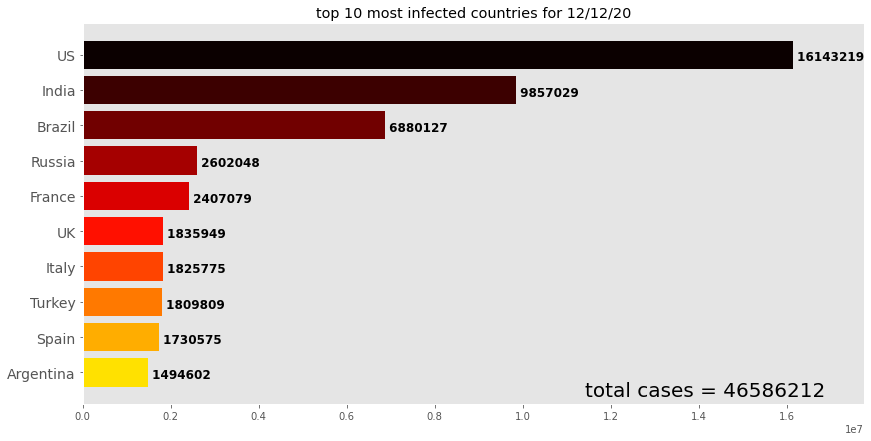

In [21]:
single_bar_chart(df='confirmed', date='12/12/20', n_shown_countries=10)

**example**

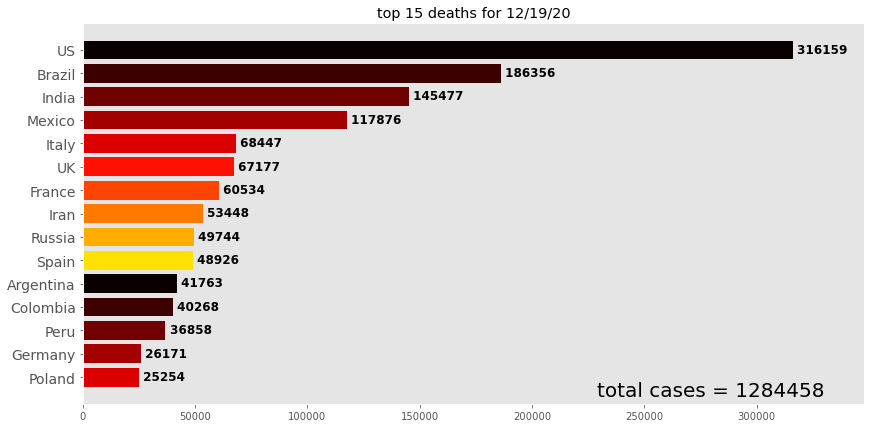

In [22]:
single_bar_chart(df='deaths', n_shown_countries=15)

**example**


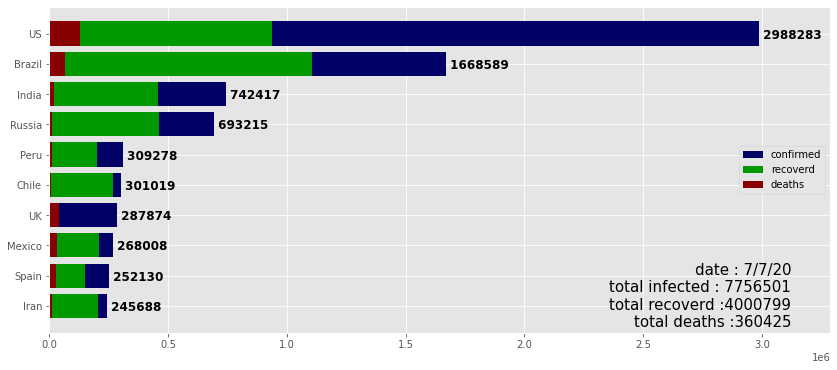

In [23]:
single_proportional_chart(date='7/7/20')

**example**


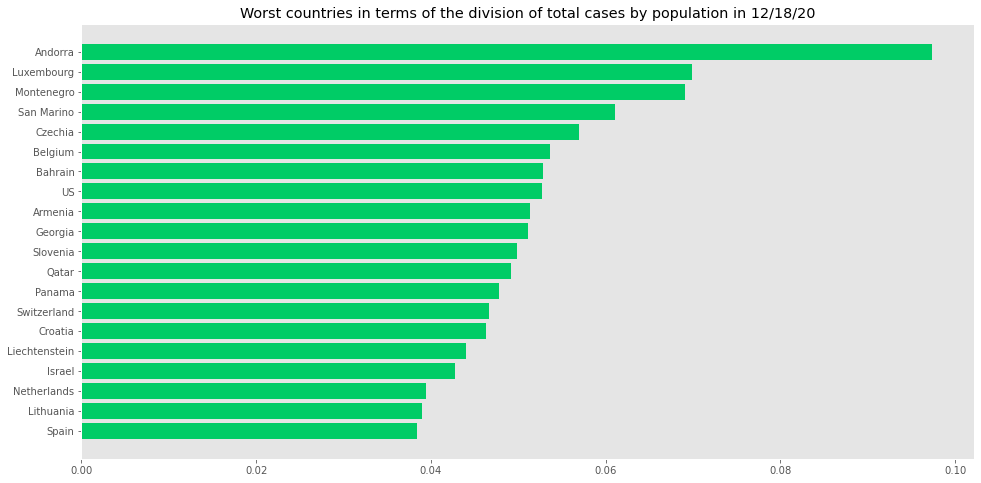

In [24]:
single_total_cases_to_population(date='12/18/20', n_shown_countries=20)

**example**


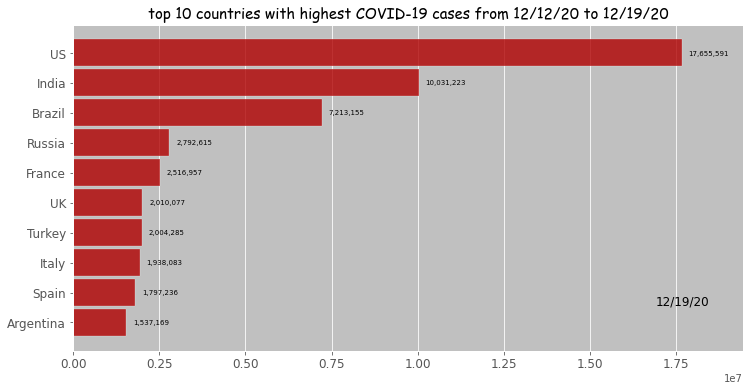

In [25]:
animated_bar_chart(c_df, dpi=144, start_date='12/12/20',
                   title='top 10 countries with highest COVID-19 cases')

**example**


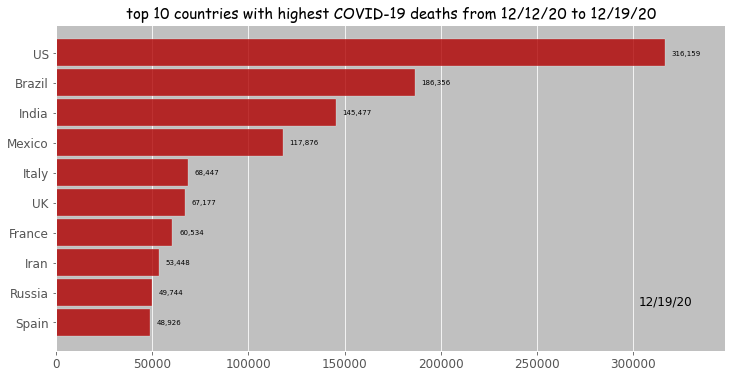

In [26]:
animated_bar_chart(d_df, start_date='12/12/20', dpi=144,
                   title='top 10 countries with highest COVID-19 deaths')

**example**

This chart is obtained by this method: Dividing the total number of patients by the population of the country for each day

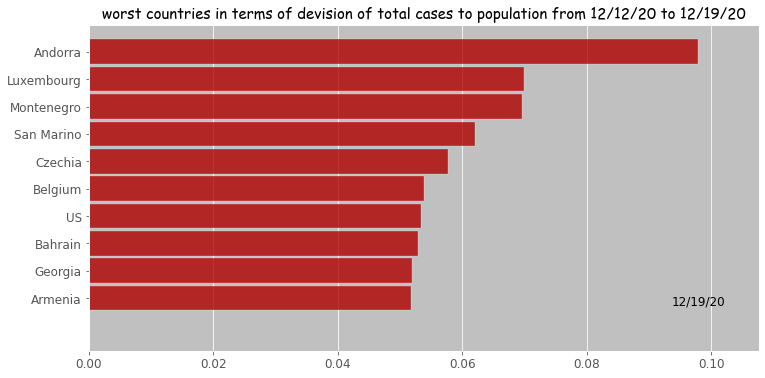

In [27]:
animated_bar_chart(temp_df, start_date='12/12/20', label_bar=False, dpi=144,
                   title='worst countries in terms of devision of total cases to population')

## other charts

### Global line chart

In [28]:
def total_counts(df, title=''):

    x = df.sum(axis=1).index
    y = df.sum(axis=1)

    fig1 = plt.figure(figsize=(12, 5))
    ax = fig1.add_subplot(111)
    ax.grid(False)
    ax.patch.set_facecolor('#404040')
    ax.ticklabel_format(style='plain')
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_xlabel("date", size=16)
    ax.set_ylabel("count", size=16)
    subtitle_count = df.loc[convert_today_date()].sum()
    ax.text(3, subtitle_count - .2 * subtitle_count,
            f'total cases : {subtitle_count}', color='white', size=12)
    ax.annotate('tipping point', size=12, xy=('3/25/20', df.sum(axis=1).loc['3/25/20']+(int(.2 * df.sum(axis=1).loc['3/27/20']))), xytext=('4/4/20', df.sum(axis=1).loc['4/4/20']+(int(.2 * df.sum(axis=1).loc[convert_today_date()]))),
                color='white', arrowprops=dict(facecolor='white', shrink=1))

    plt.locator_params(nbins=4)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=12)
    plt.xlabel('date')
    plt.plot(df.sum(axis=1), color='red', lw=2.5)
    plt.title(title + f' (until {convert_today_date()}) ')
    plt.fill_between(x, y, alpha=.7)
    plt.show()

**example 8**

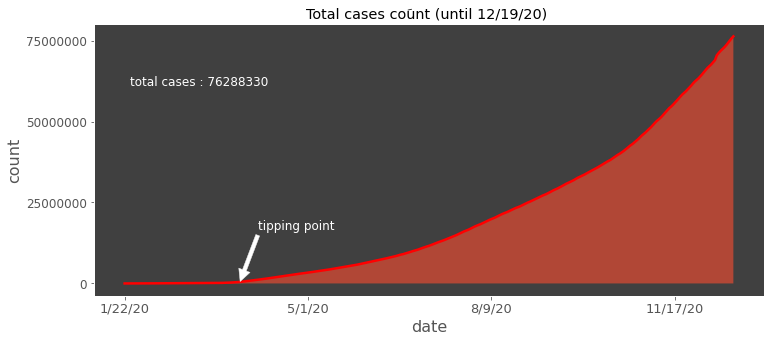

In [29]:
total_counts(c_df, title='Total cases coَunt')

**example 9**

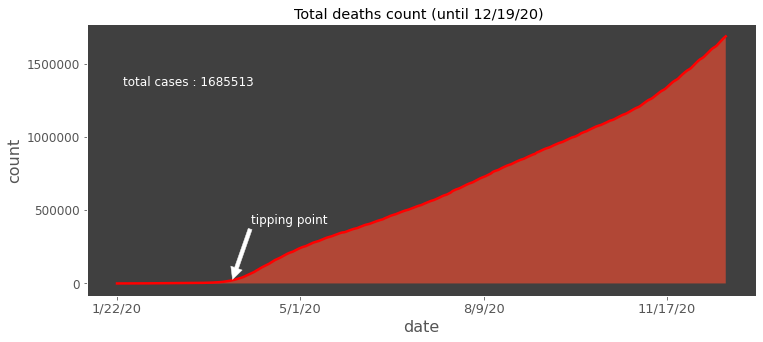

In [30]:
total_counts(d_df, title='Total deaths count')

**since the tipping point date for recovered cases is different. I'm going to plot it manually.**

**example**

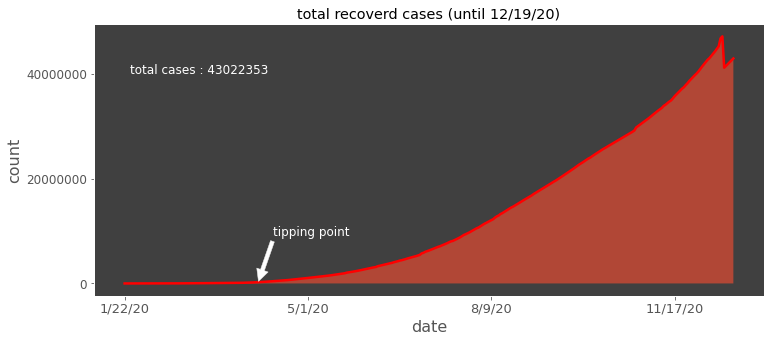

In [31]:
x = r_df.sum(axis=1).index
y = r_df.sum(axis=1)

fig1 = plt.figure(figsize=(12, 5))
ax = fig1.add_subplot(111)
ax.grid(False)
ax.patch.set_facecolor('#404040')
ax.ticklabel_format(style='plain')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel("date", size=16)
ax.set_ylabel("count", size=16)
ax.text(3, 40000000,
        f'total cases : {r_df.loc[convert_today_date()].sum()}', color='white', size=12)
ax.annotate('tipping point', xy=('4/4/20', r_df.sum(axis=1).loc['4/8/20']+(int(.2 * r_df.sum(axis=1).loc['4/8/20']))), size=12, xytext=('4/12/20', r_df.sum(axis=1).loc['4/12/20']+(int(.2 * r_df.sum(axis=1).loc[convert_today_date()]))),
            color='white', arrowprops=dict(facecolor='white', shrink=1))

plt.locator_params(nbins=4)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('date')
plt.plot(r_df.sum(axis=1), color='red', lw=2.5)
plt.title(f'total recoverd cases (until {convert_today_date()})')
plt.fill_between(x, y, alpha=.7)
plt.show()

Text(0.5, 1.0, 'Global chart')

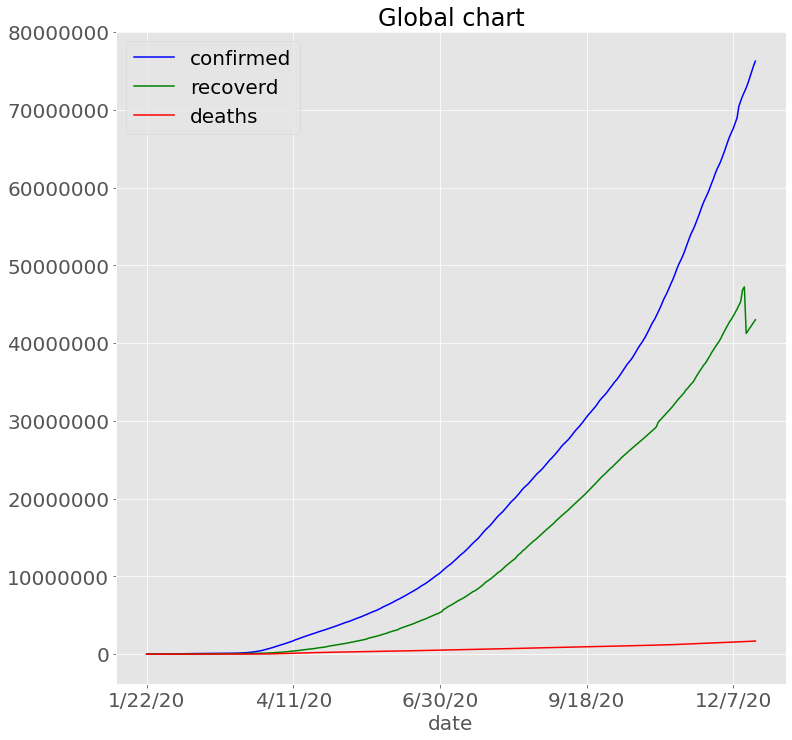

In [32]:
fig1 = plt.figure(figsize=(12, 12))
ax = fig1.add_subplot(111)

ax.ticklabel_format(style='plain')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

plt.xlabel('date', size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(c_df.sum(axis=1), color='blue')
plt.plot(r_df.sum(axis=1), color='green')
plt.plot(d_df.sum(axis=1), color='red')

plt.legend(['confirmed', 'recoverd', 'deaths'], prop={'size': 20})
plt.title('Global chart', size=24)

### country chart

In [33]:
def country_chart(country='US', recoverd=True, deaths=True):
    fig1 = plt.figure(figsize=(12, 12))
    ax = fig1.add_subplot(111)
    subtitle_count_c = c_df.loc[convert_today_date(), 'US'].sum()
    ax.ticklabel_format(style='plain')
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ylim = int(ax.get_ylim()[1])

    plt.xlabel('date', size=20)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)

    plt.plot(c_df[country], label='confirmed', color='blue')
    if recoverd:
        plt.plot(r_df[country], label='recoverd', color='green')
    if deaths:
        plt.plot(d_df[country], label='deaths', color='red')
    plt.legend(prop={'size': 20})
    plt.title(f'COVID-19 chart for {country}', size=22)
    print(int(ax.get_ylim()[1]/2))
    plt.show()

791971


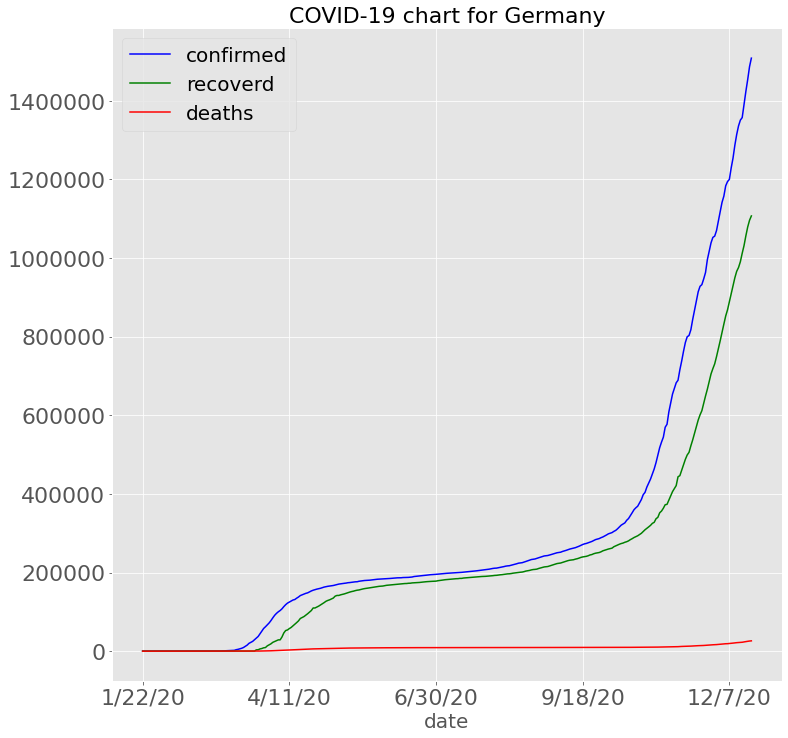

In [34]:
country_chart('Germany')

22880


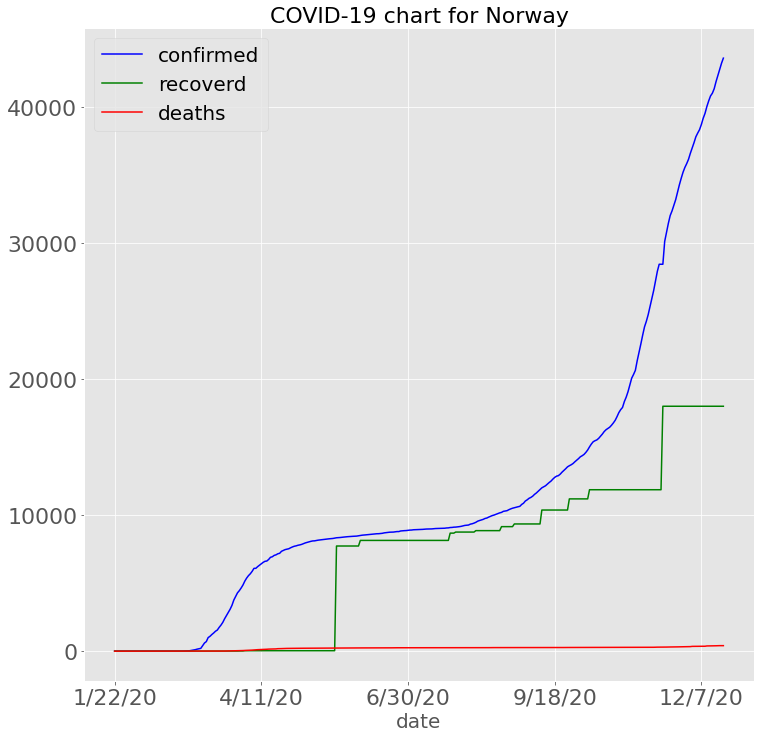

In [35]:
country_chart('Norway')

604837


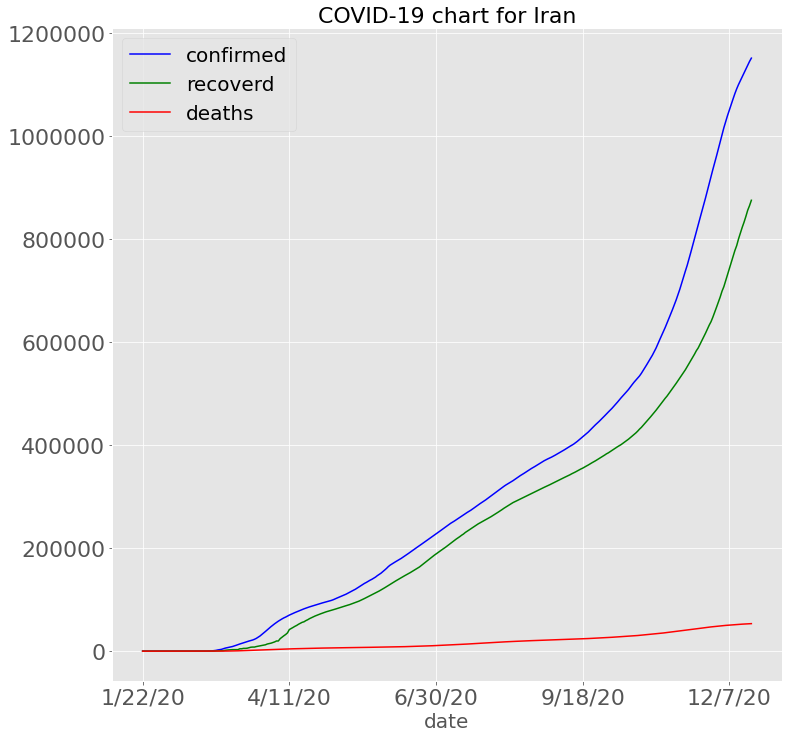

In [36]:
country_chart('Iran')

THANKS!